# 2 Neural Networks

## 2.1 Model representation

In [1]:
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Setup parameters
input_layer_size = 400 # input layer - each image of a digit is 20x20 pixels
hidden_layer_size = 25 # hidden layer - 25 units
num_labels = 10        # output layer - 10 labels, from 1 to 10

In [3]:
data = scipy.io.loadmat('data/ex3data1.mat')
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
# X is 5,000 examples of 20x20 pixel images, each image is a handwritten number
# Each 20x20 image is stored as a 400-dimensional vector
data['X'].shape

(5000, 400)

In [5]:
# y is the numeral represented by each image
data['y'].shape

(5000, 1)

In [6]:
# Store in numpy arrays to make things easier
X = data['X']
y = data['y']

In [7]:
m = X.shape[0] # number of examples

In [8]:
# Randomly select 100 images to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100], :]

In [9]:
def displayData(X):
    '''
    Displays 2D data stored in X in a nice grid.
    '''
    m = X.shape[0] # number of images
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    
    n = X.shape[1] # total number of pixels per image
    image_side = int(math.sqrt(n))
    
    plt.figure(figsize=(8,8))
    
    for i in range(m):
        image = X[i]
        image = np.reshape(image, (image_side, image_side), order='F')
        plt.subplot(display_rows, display_cols, i+1)
        plt.imshow(image, cmap='Greys')
        plt.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

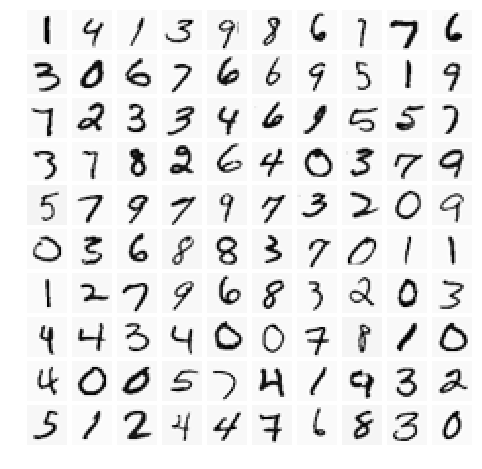

In [10]:
displayData(sel)

In [11]:
# Load some pre-initialized neural network parameters into variables Theta1 and Theta2

params = scipy.io.loadmat('data/ex3weights.mat')
Theta1 = params['Theta1']
Theta2 = params['Theta2']

In [12]:
Theta1.shape # parameters for 25-unit hidden layer

(25, 401)

In [13]:
Theta2.shape # parameters for 10-unit output layer

(10, 26)

## 2.2 Feedforward Propagation and Prediction

In [14]:
def sigmoid(z):
    g = 1. / (1. + math.exp(-z))
    return g

sigmoid = np.vectorize(sigmoid)

In [15]:
def predict(Theta1, Theta2, X):
    '''
    predict(Theta1, Theta2, X) outputs the predicted label of X given the
    trained weights of a neural network (Theta1, Theta2).
    '''
    p = np.zeros([X.shape[0], 1]) # prediction

    m = X.shape[0] # number of examples
    num_labels = Theta2.shape[0] # number of labels
    
    # Add column of ones to X for bias
    X = np.column_stack((np.ones(m), X))

    # Calculate outputs of hidden layer
    z2 = np.dot(X, Theta1.T)
    a2 = sigmoid(z2)
    
    # Add column of ones to hidden layer output for bias
    a2 = np.column_stack((np.ones(a2.shape[0]), a2))
    
    # Calculate outputs of output layer
    z3 = np.dot(a2, Theta2.T)
    a3 = sigmoid(z3)
    
    # Make prediction
    p = np.argmax(a3, axis=1) + 1 # +1 to change 0-9 into 1-10
    p = np.reshape(p, (m,1)) # to make compatible with y.shape
    
    return p

In [16]:
pred = predict(Theta1, Theta2, X)

In [17]:
print('Training set accuracy: %.2f%%' %(np.mean(pred == y) * 100))
print('Expected accurancy (approx.): 97.5%')

Training set accuracy: 97.52%
Expected accurancy (approx.): 97.5%


### Show a few examples just for fun

In [18]:
def displayPredictions(X):

    m = X.shape[0] # number of images
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    
    n = X.shape[1] # total number of pixels per image
    image_side = int(math.sqrt(n))
    
    plt.figure(figsize=(8,8))
    
    for i in range(m):
        # Plot image
        image = X[i]
        image = np.reshape(image, (image_side, image_side), order='F')
        plt.subplot(display_rows, display_cols, i+1)
        
        plt.imshow(image, cmap='Greys')
        plt.axis('off')
        
        # Make and print prediction for image
        rand_image = X[i]
        rand_image = rand_image.reshape([1,400])
       
        pred = predict(Theta1, Theta2, rand_image)
        pred_int = int(pred)
        if pred_int==10: # Fix the fact that 0 is mapped to 10
            pred_int=0
    
        pred_str = 'Prediction:' + str(pred_int)
        plt.text(0,1.5, pred_str, color='b')
        
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

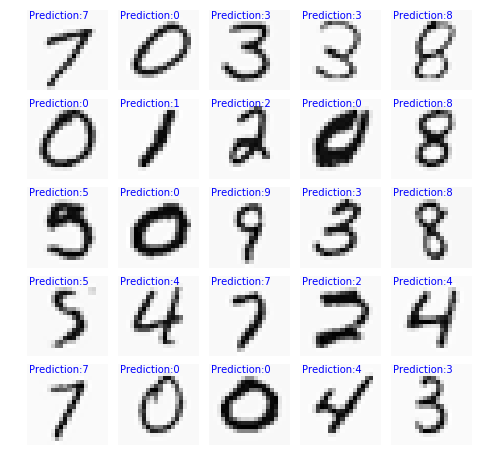

In [19]:
# Randomly select 25 images and predictions to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:25], :]
displayPredictions(sel)